In [11]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [2]:
# Step 2: Load the clicks and conversions datasets
clicks = pd.read_csv("amazon_affiliate_clicks.csv")
conversions = pd.read_csv("amazon_affiliate_conversions.csv")

# Merge to create target variable 'is_converted'
data = clicks.merge(conversions[['click_id']], on='click_id', how='left', indicator=True)
data['is_converted'] = data['_merge'].apply(lambda x: 1 if x == 'both' else 0)
data.drop(columns=['_merge'], inplace=True)

# Quick look at data
data[['product_category', 'product_price', 'country', 'device_type', 'utm_source',
      'page_scroll_depth', 'time_on_page_before_click', 'is_converted']].head()


,product_category,product_price,country,device_type,utm_source,page_scroll_depth,time_on_page_before_click,is_converted
0,Electronics,49.99,US,Desktop,google,0.75,45,1
1,Electronics,49.99,US,Desktop,google,0.75,45,1
2,Electronics,39.99,US,Mobile,facebook,0.60,32,1
3,Kitchen,79.95,CA,Desktop,pinterest,0.85,67,1
4,Kitchen,79.95,CA,Desktop,pinterest,0.85,67,1


In [ ]:
#EDA

/tmp/ipython-input-562770265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_converted', data=data, palette='Set2')


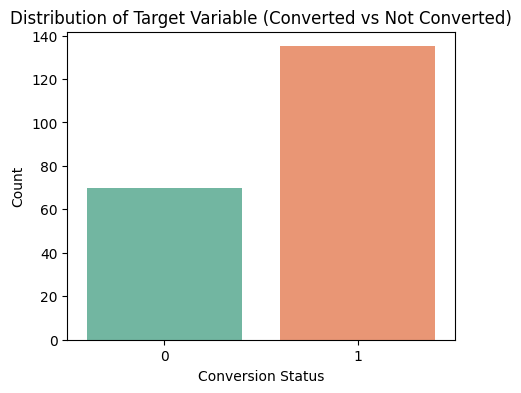

is_converted
1    0.658537
0    0.341463
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,4))
sns.countplot(x='is_converted', data=data, palette='Set2')
plt.title("Distribution of Target Variable (Converted vs Not Converted)")
plt.xlabel("Conversion Status")
plt.ylabel("Count")
plt.show()

# Optional: show ratio
print(data['is_converted'].value_counts(normalize=True))

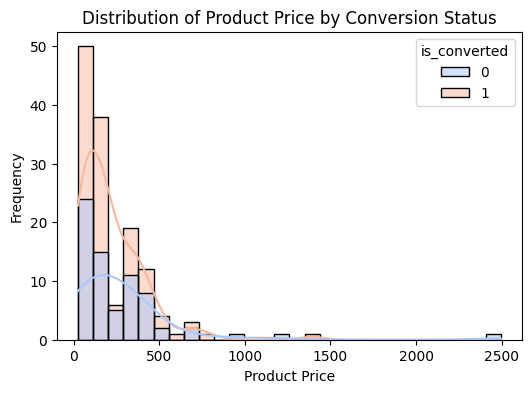

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='product_price', hue='is_converted', kde=True, palette='coolwarm')
plt.title("Distribution of Product Price by Conversion Status")
plt.xlabel("Product Price")
plt.ylabel("Frequency")
plt.show()

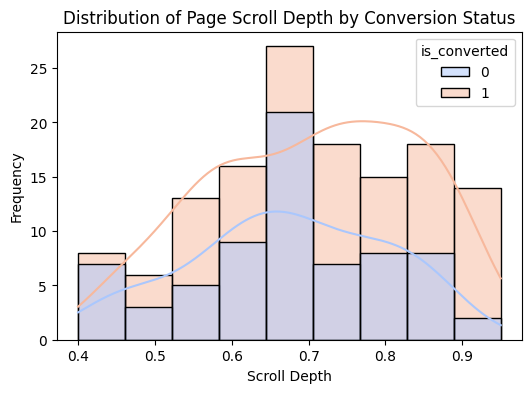

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='page_scroll_depth', hue='is_converted', kde=True, palette='coolwarm')
plt.title("Distribution of Page Scroll Depth by Conversion Status")
plt.xlabel("Scroll Depth")
plt.ylabel("Frequency")
plt.show()

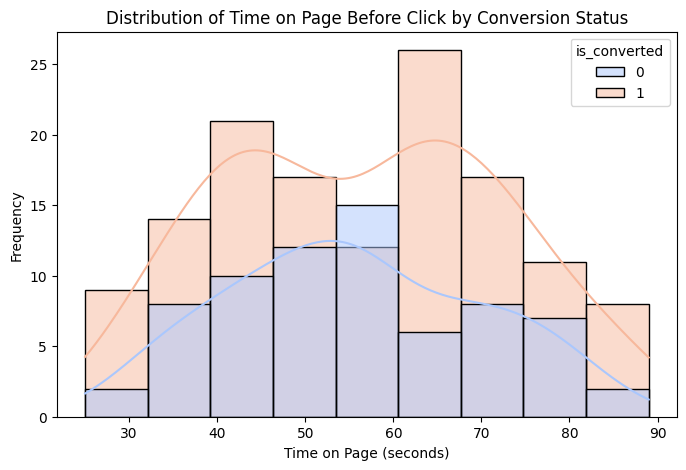

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='time_on_page_before_click', hue='is_converted', kde=True, palette='coolwarm')
plt.title("Distribution of Time on Page Before Click by Conversion Status")
plt.xlabel("Time on Page (seconds)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1997434654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='is_converted', data=data, estimator=lambda x: sum(x)/len(x), palette='viridis')


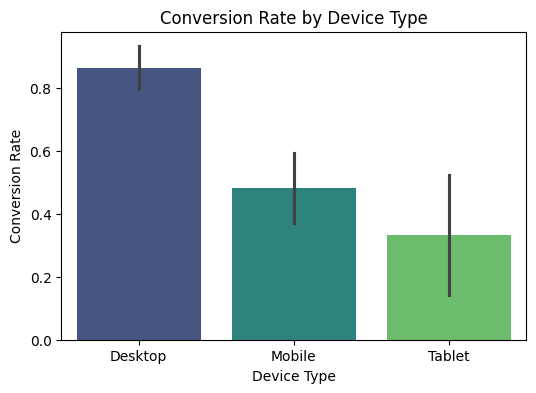

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x='device_type', y='is_converted', data=data, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title("Conversion Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Conversion Rate")
plt.show()


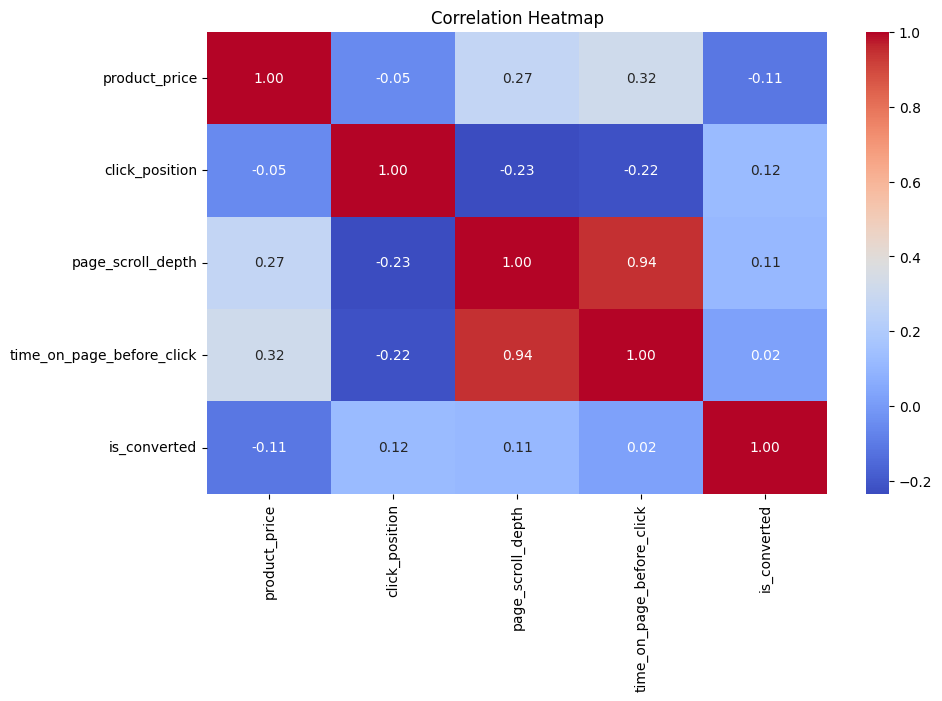

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

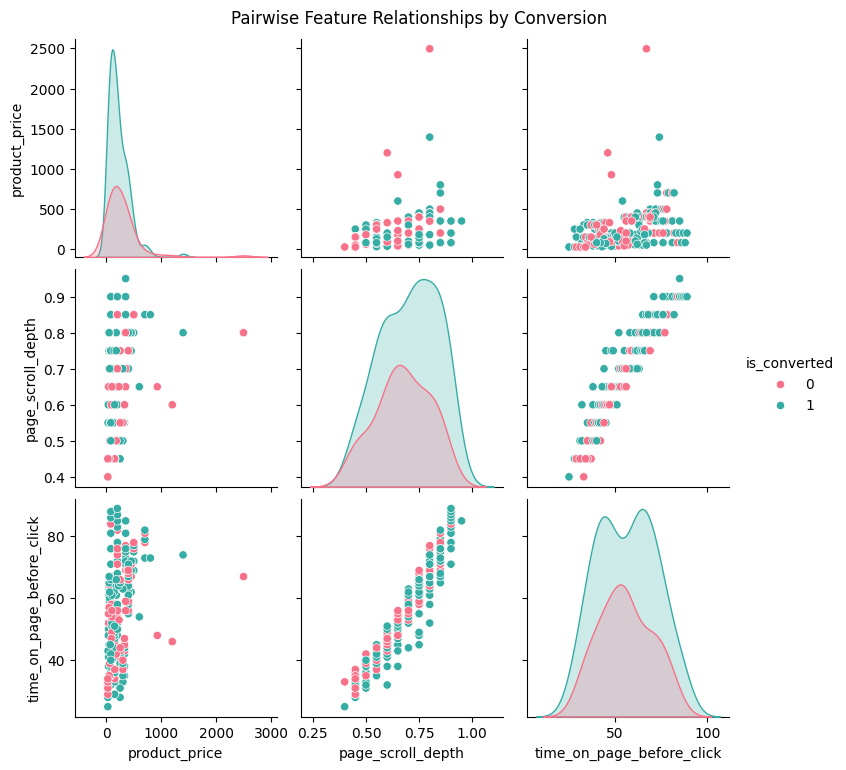

In [19]:
sns.pairplot(data[['is_converted', 'product_price', 'page_scroll_depth', 'time_on_page_before_click']],
             hue='is_converted', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Feature Relationships by Conversion", y=1.02)
plt.show()


In [3]:
# Step 3: Define features and target
X = data[['product_category', 'product_price', 'country', 'device_type',
          'utm_source', 'page_scroll_depth', 'time_on_page_before_click']]
y = data['is_converted']

In [4]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical columns
numeric_features = ['product_price', 'page_scroll_depth', 'time_on_page_before_click']
categorical_features = ['product_category', 'country', 'device_type', 'utm_source']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [8]:
# Step 5: Create pipeline with preprocessing + model
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['product_price',
                                                   'page_scroll_depth',
                                                   'time_on_page_before_click']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category',
                                                   'country', 'device_type',
                                                   'utm_source'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [10]:
# Step 6: Evaluate model
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_pred = log_reg_model.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1 score: 0.7619047619047619

Confusion Matrix:
 [[10 17]
 [ 3 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.37      0.50        27
           1       0.65      0.91      0.76        35

    accuracy                           0.68        62
   macro avg       0.71      0.64      0.63        62
weighted avg       0.70      0.68      0.65        62



In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 5, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Params: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Score: 0.8652110897398536


In [12]:
from sklearn.metrics import recall_score, f1_score

print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Recall: 0.9142857142857143
F1 Score: 0.7619047619047619


In [20]:
#KMEANS

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Use only behavioral & numerical data for clustering
X = data[['product_price', 'page_scroll_depth', 'time_on_page_before_click']]


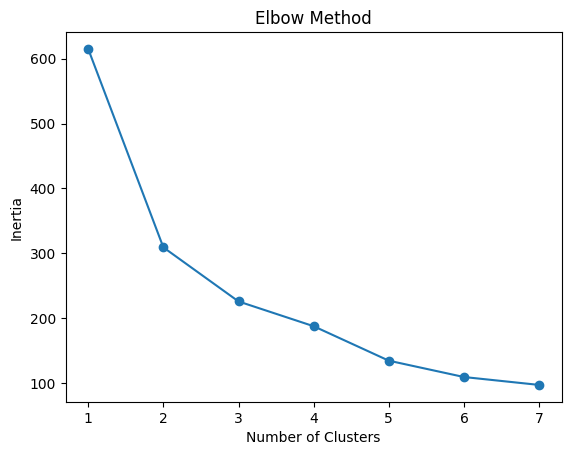

In [23]:
# Use Elbow Method to find optimal k
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)


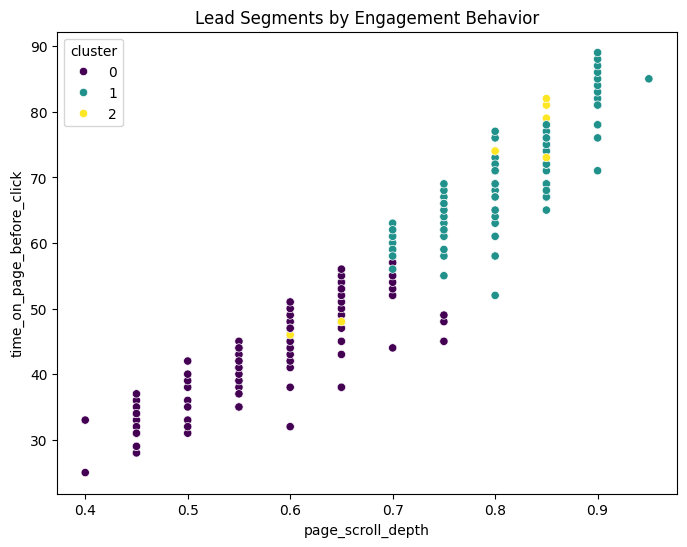

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='page_scroll_depth', y='time_on_page_before_click',
                hue='cluster', data=data, palette='viridis')
plt.title('Lead Segments by Engagement Behavior')
plt.show()


In [30]:
data.groupby('cluster')[['product_price', 'page_scroll_depth', 'time_on_page_before_click']].mean()


,product_price,page_scroll_depth,time_on_page_before_click
cluster,,,
0,144.958218,0.584653,43.297030
1,256.791809,0.800000,68.510638
2,1031.474000,0.795000,70.100000
